<a href="https://colab.research.google.com/github/umbertogagl97/exercise/blob/main/FGM_attack_B%26W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import iniziali**

Import ART

In [1]:
#importa ART
!pip install adversarial-robustness-toolbox

     |████████████████████████████████| 1.1 MB 2.8 MB/s 
     |████████████████████████████████| 3.4 MB 41.4 MB/s 
     |████████████████████████████████| 25.3 MB 82 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


Librerie

In [2]:
#Librerie
import tensorflow as tf

tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

from art.estimators.classification import KerasClassifier
from art.utils import load_dataset

import cv2
from google.colab.patches import cv2_imshow

#import torch

#**Def variabili**

In [3]:
#salvataggio modello
model_save_name = 'model_DenseNet201'
path_model_save = F"/content/gdrive/My Drive/ModelliCNN/{model_save_name}" 

#immagini google
path_img_google="/content/gdrive/MyDrive/immagini_google/"

# **Collegamento google driv**e

In [11]:
#collegamento google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Dataset**

Load dataset stl10

In [12]:
#10 classes: airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck.
#96x96 pixels, colored.
(x_train, y_train), (x_test_tot, y_test_tot), min_, max_ = load_dataset(str("stl10")) #carica train e test set

In [13]:
print(x_train.shape,x_test_tot.shape)
#5000 immagini di train e 8000 di test: 500 train e 800 test per ogni classe

(5000, 96, 96, 3) (8000, 96, 96, 3)


Riduzione training set

In [14]:
#x_train, y_train = x_train[:500], y_train[:500] #prende solo le prime 500 immagini di training

#test set ridotto
x_test, y_test = x_test_tot[:500], y_test_tot[:500]

#test set totale
#x_test, y_test = x_test_tot, y_test_tot

Stampa dimensioni

In [15]:
im_shape = x_train[0].shape
print("dimensioni immagine: ",im_shape)
print("dimensioni train set: ",x_train.shape)
print("dimensioni vettore classi reali: ",y_train.shape)
print("dimensioni test set: ",x_test.shape)

dimensioni immagine:  (96, 96, 3)
dimensioni train set:  (5000, 96, 96, 3)
dimensioni vettore classi reali:  (5000, 10)
dimensioni test set:  (500, 96, 96, 3)


#Caricamento modello da drive

In [16]:
#load model
model= tf.keras.models.load_model(path_model_save)

# **Creazione classificatore ART**

In [17]:
#creazione classificatore di tipo Keras usando il modello addestrato, poiché ART supporta solo determinati classificatori
classifier = KerasClassifier(model=model, clip_values=(min_, max_)) #è un wrapper messo a disposizione da ART per creare un classificatore a partire da un modello addestrato

# **Testing su immagini originali**

In [60]:
# Evaluate the classifier on the test set 
value_preds=classifier.predict(x_test) #contiene i valori tra 0 e 1 predetti per ognuna delle 10 classi e per ogni immagine
preds = np.argmax(value_preds, axis=1) #(le predizioni vanno da 0 a 9 e indicano la classe predetta)
acc = (np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0])*100
print("Accuracy on test set:", (round(acc,2)))
#print("classi predette: ",preds)

Accuracy on test set: 77.0


#Import FGM modificato1 (importa tutta la repository art)

creazione directory con repository di un determinato branch

In [22]:
#crea directory art nella cartella content
!git clone -b learning https://github.com/umbertogagl97/adversarial-robustness-toolbox.git

Cloning into 'adversarial-robustness-toolbox'...
remote: Enumerating objects: 58028, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 58028 (delta 20), reused 24 (delta 13), pack-reused 57980
Receiving objects: 100% (58028/58028), 182.01 MiB | 25.96 MiB/s, done.
Resolving deltas: 100% (45839/45839), done.


In [33]:
#%cd adversarial-robustness-toolbox/art/attacks/evasion
%ls


adversarial_asr.py                  iterative_method.py
adversarial_patch/                  lowprofool.py
auto_attack.py                      newtonfool.py
auto_projected_gradient_descent.py  over_the_air_flickering/
boundary.py                         pe_malware_attack.py
brendel_bethge.py                   pixel_threshold.py
carlini.py                          projected_gradient_descent/
decision_tree_attack.py             __pycache__/
deepfool.py                         saliency_map.py
dpatch.py                           shadow_attack.py
dpatch_robust.py                    shapeshifter.py
elastic_net.py                      simba.py
fast_gradient.py                    spatial_transformation.py
feature_adversaries/                square_attack.py
frame_saliency.py                   targeted_universal_perturbation.py
geometric_decision_based_attack.py  universal_perturbation.py
hclu.py                             virtual_adversarial.py
hop_skip_jump.py                    wasserstein.p

In [46]:
import fast_gradient

In [38]:
attack=fast_gradient.FastGradientMethod(classifier)

hello


# **Import FGM modificato2**

copia file

In [19]:
#copia il file da github e lo inserisce nella directory corrente (content)
#N.B. ha bisogno del link al raw del file
!wget https://raw.githubusercontent.com/umbertogagl97/adversarial-robustness-toolbox/learning/art/attacks/evasion/fast_gradient.py

--2021-09-26 14:09:40--  https://raw.githubusercontent.com/umbertogagl97/adversarial-robustness-toolbox/learning/art/attacks/evasion/fast_gradient.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27140 (27K) [text/plain]
Saving to: ‘fast_gradient.py.1’

fast_gradient.py.1  100%[===================>]  26.50K  --.-KB/s    in 0s      

2021-09-26 14:09:40 (75.9 MB/s) - ‘fast_gradient.py.1’ saved [27140/27140]



In [20]:
from fast_gradient import *

# **Attacco FGM**

Definizione attacco

In [34]:
# FGM
attack = FastGradientMethod(estimator=classifier, eps=0.01,eps_step=0.005)

hello


Generazione adversarial samples

In [35]:
x_test_adv = attack.generate(x=x_test,y=y_test) #aggiunge una perturbazione alle immagini del test set
#N.B. si possono passare le classi reali del test set (con y=y_test) e in questo caso FGM calcolerà le perturbazioni in modo che il classificatore
#non predica queste classi. Mentre, se non passo y_test, le calcolerà in modo da non fargli predire la classe predetta normalmente (la quale può essere diversa da quella reale
#se il classificatore non è corretto)

# **Calcolo perturbazioni**

In [36]:
perturb=x_test_adv-x_test #calcolo della perturbazione

perturbation_mean = np.mean(np.abs((x_test_adv - x_test)))

#N.B. problema nel calcolo della perturbazione, con la sottrazione si ha un'immagine [-1,1], di seguito è normalizzata in [0,1]
min_p, max_p = np.amin(perturb), np.amax(perturb)
perturb = (perturb - min_p) / (max_p - min_p)
#se non normalizzo, la funzione che uso per stampare ritaglia automaticamente nell'intervallo [0,1] quindi perdo informazioni

print('Average perturbation: {:4.2f}'.format(perturbation_mean))

Average perturbation: 0.01


#**Testing su immagini perturbate**

In [61]:
# Evaluate the classifier on the adversarial samples FGM
value_preds_after=classifier.predict(x_test_adv)
preds_after = np.argmax(value_preds_after, axis=1)
acc_after = (np.sum(preds_after == np.argmax(y_test, axis=1)) / y_test.shape[0])*100
print("Accuracy on adversarial samples:", (round(acc_after,2)))
#print("classi predette su test set perturbato: ",preds_after)

Accuracy on adversarial samples: 7.4


# **Stampa subplot prime 10 immagini**

Immagine  0


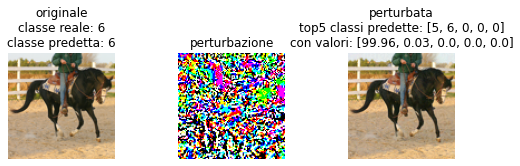

Immagine  1


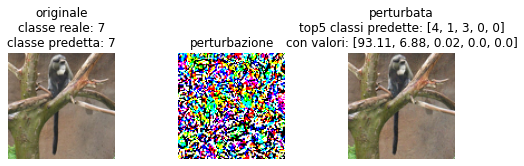

Immagine  2


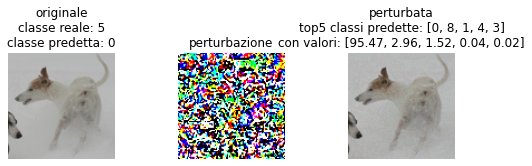

Immagine  3


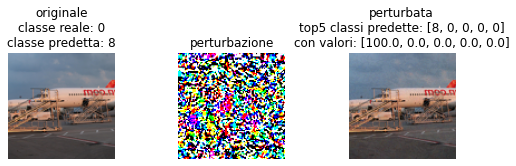

Immagine  4


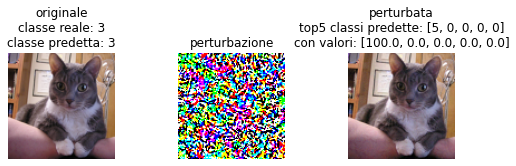

Immagine  5


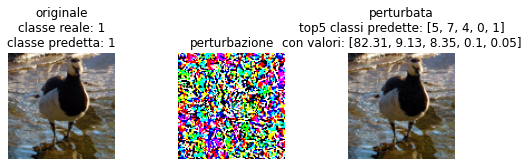

Immagine  6


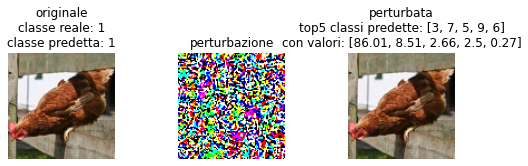

Immagine  7


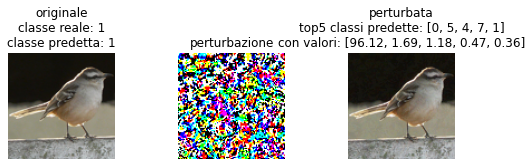

Immagine  8


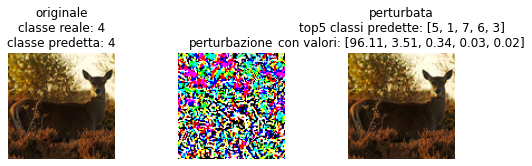

Immagine  9


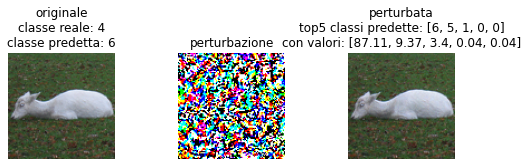

In [155]:
#stampa subplot

#cv2_imshow(cv2.hconcat([x_test[0,:,:,:]*255,x_test[1,:,:,:]*255,x_test[2,:,:,:]*255]))
#N.B. plt.imshow usa range 0,1 per immagini rgb, mentre cv2 usa 0,255
import matplotlib.pyplot as plt    
#nel seguente ciclo for si crea un vettore delle classi predette ordinato per probabilità decrescente
for i in range(10):#(x_test.shape[0]):
  value=(value_preds_after[i,:]*100).round(2)
  value_sorted=sorted(value,reverse=True)
  classes=[]
  for j in range(value.size) :
    ind=np.where(value==value_sorted[j]) #restituisce l'indice in value del valore uguale a value_sorted[i], quindi è la classe
    classes.append(ind[0][0]) #classes è il vettore finale
  
  #in seguito per ogni immagine del test set si stampa un subplot
  fig = plt.figure(figsize=[8,8])
  plt.subplots_adjust(wspace=0.6)
  print('\033[1m'+"Immagine "+'\033[1m',i) #valore END: '\033[0m'
  #originale
  ax1 = fig.add_subplot(131) #subplot con 3 righe e due colonne
  ax1.axis('off')
  ax1.imshow(cv2.rotate(x_test[i,:,:,:],cv2.cv2.ROTATE_90_CLOCKWISE))
  ax1.title.set_text("originale\nclasse reale: "+str(np.argmax(y_test[i,:]))+"\nclasse predetta: "+str(preds[i]))
  #perturbazione
  ax2 = fig.add_subplot(132)
  ax2.imshow(cv2.rotate(perturb[i,:,:,:],cv2.cv2.ROTATE_90_CLOCKWISE))
  ax2.axis('off')
  ax2.title.set_text("perturbazione")
  #perturbata
  ax3 = fig.add_subplot(133)
  ax3.imshow(cv2.rotate(x_test_adv[i,:,:,:],cv2.cv2.ROTATE_90_CLOCKWISE))#,aspect='auto')
  ax3.axis('off')
  ax3.title.set_text("perturbata\ntop5 classi predette: "+str(classes[:5])+"\ncon valori: "+str(value_sorted[:5]))
  plt.show()
 